# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section, the packages and libraries required to carry out data loading, manipulation and visualisation; data engineering and visualisation; model building and evaluation are imported . |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np
import eli5

# Libraries for data preparation and model building
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from eli5.sklearn import PermutationImportance

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from statsmodels.graphics.correlation import plot_corr
from statsmodels.formula.api import ols

from xgboost import XGBRegressor

# Enable interactive visualisations in Jupyter
!jupyter nbextension enable --py widgetsnbextension

from ipywidgets import interact, interact_manual, widgets

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = ['full_data', 'df_train', 'df_test', 'X', 'y', 'X_train', 'y_train', 
                      'X_test', 'X_valid', 'y_valid']

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [2]:
# Instansiate the Plotly charting library.
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
# We use plotly.offline as this allows us to create interactive 
# visualisations without the use of an internet connection, 
# making our notebook more distributable to others. 
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

# The Cufflinks library allows us to directly bind 
# Pandas dataframes to Plotly charts. 
import cufflinks as cf
# Once again we use the Cufflinks library in offline mode. 
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)

# Extra options. We use these to make our interactive 
# visualisations more aesthetically appealing. 
from IPython.core.display import HTML
pd.options.display.max_rows = 30
pd.options.display.max_columns = 25

# Show all code cells outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import plotly.figure_factory as ff

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| This section of the project is dedicated to loading of the training and testing datasets from the `df_train` and `df_test` csv files into respective DataFrames. Both datasets accompany this notebook are available in the same file path as the notebook. Cleaning of the dataset to handle missing values and remove outliers was also carried out in this section|

---

In [3]:
# load the train data
df_train = pd.read_csv('df_train.csv')

# load the test data
df_test = pd.read_csv('df_test.csv') 

For this project, Pandas library will be used to access and manipulate the datasets. Hence, the training and testing datasets are loaded into df_train and df_test pandas dataframes respectively. A Dataframe is a native data structure of the Pandas library which provides easier and visually appealling means of handling data. <br /><br />



In [4]:
#Seperating the target variable from the predictors
y = df_train[['load_shortfall_3h']]
X = df_train.drop(['load_shortfall_3h'], axis=1)

##### Overview of the dataset

In [5]:
# display the first five rows of the dataset
X.head(5)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,...,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,...,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,...,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,...,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,...,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437


To have a quick overview of the dataset, the DataFrame.head() pandas method was used to display the first five rows of the train dataset. Although, the displayed result does not capture the entire features, but it is immediately obvious that many features including the target variable contain float values rounded to six decimal places. Hence, the problem can be confidently classified as a regression problem.
<br /><br /><br />

In [6]:
# checking to see variables that are non-numeric
# since, machine learning models don't work with object datatypes
print('Columns that need to be drop or converted into numeric',
      [x for x in X.select_dtypes('object')])

Columns that need to be drop or converted into numeric ['time', 'Valencia_wind_deg', 'Seville_pressure']


In [7]:
# Information on the response variable
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   load_shortfall_3h  8763 non-null   float64
dtypes: float64(1)
memory usage: 68.6 KB


In [8]:
#understanding the shape of our trian dataset (predictiors)
print(f'the train set contain {X.shape[0]} datapoint (row), and {X.shape[1]} variables (columns)')

the train set contain 8763 datapoint (row), and 48 variables (columns)


###### Checking for null values(s) and replacing appriopately

In [9]:
#checking null values in the train dataset
y.isnull().sum()[y.isnull().sum() > 0]

Series([], dtype: int64)

There is no null value in our target variable as excepted

In [10]:
#checking null values in the train dataset
X.isnull().sum()[X.isnull().sum() > 0]

Valencia_pressure    2068
dtype: int64

This is good, we only need to modify one column in the dataset
- Dropping won't be good since it seems like an important variable and the null values are less than 25%
- We are going to use on of the Measure of Central Tendencies (M.C.T) to fill the 'null' values

In [11]:
#checking for the mean median and mode of the variable
stat = [np.mean(X.Valencia_pressure), X.Valencia_pressure.mode()[0], X.Valencia_pressure.median()]
stat = np.around(stat, 1)
print(f'Mean: {stat[0]}, Mode: {stat[1]}, Median: {stat[2]}')

Mean: 1012.1, Mode: 1018.0, Median: 1015.0


In [12]:
# Replacing the value with the Median: 1015
X['Valencia_pressure'] = X['Valencia_pressure'].fillna(1015)
df_test['Valencia_pressure'] = df_test['Valencia_pressure'].fillna(1015)

We are using the median value since it is robust, resistant to outliers and eual to our mode

In [13]:
#checking AGAIN for 'null' in the full_data
X.isnull().sum()[X.isnull().sum() > 0]

Series([], dtype: int64)

#### Modifying the Object type columns
##### Converting the time column into features

In [14]:
# Checking the data point scope
X[['time']].sample(5) #representative overview of the time column

,time
3767,2016-04-16 12:00:00
3613,2016-03-28 06:00:00
7864,2017-09-10 15:00:00
8600,2017-12-11 15:00:00
1117,2015-05-21 06:00:00


We can split down to the second but it seems 'minutes' and 'seconds' are zeros;
- we split the time column into ['year', 'month', 'day', 'hour']

In [15]:
# creating a function that can split the time column 
def convert_time(row):
    date, time = row.split(' ')
    year, month, day = date.split('-')
    hour = time.split(':')[0]
    return year, month, day, hour # we can also return a pd.Series([...]) and not use a zip function later on

In [16]:
# splitting the time column into features
X['year'], X['month'], X['day'], X['hour']\
                            = zip(*X['time'].map(convert_time)) 

df_test['year'], df_test['month'], df_test['day'], df_test['hour']\
                            = zip(*df_test['time'].map(convert_time)) 

In [17]:
# we need to convert the new features to numeric and drop the old time column
cols = ['year', 'month', 'day', 'hour']
X[cols] = X[cols].apply(pd.to_numeric, errors='coerce', axis=1)
df_test[cols] = df_test[cols].apply(pd.to_numeric, errors='coerce', axis=1)
X.drop('time', axis=1, inplace=True)
df_test.drop('time', axis=1, inplace=True)

In [18]:
X.head()

,Unnamed: 0,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,...,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,year,month,day,hour
0,0,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,...,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,2015,1,1,3
1,1,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,...,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,2015,1,1,6
2,2,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,...,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,2015,1,1,9
3,3,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,...,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,2015,1,1,12
4,4,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,...,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,2015,1,1,15


###### Converting the Valencia_wind_deg into numeric

In [19]:
# Checking the data point scope
X.Valencia_wind_deg.sample(5)

5643     level_1
5474    level_10
1735     level_2
5088     level_2
6535     level_6
Name: Valencia_wind_deg, dtype: object

This is easy considering it seems like a bad imputation

In [20]:
X['Valencia_wind_deg'] = X['Valencia_wind_deg'].str.extract('(\d+)').astype('int64')
df_test['Valencia_wind_deg'] = df_test['Valencia_wind_deg'].str.extract('(\d+)').astype('int64')


###### Convert the Seville_pressure into numeric

In [21]:
# Checking the data point scope
X.Seville_pressure.sample(5)

4916     sp6
4644    sp18
320     sp20
4884    sp13
8087    sp15
Name: Seville_pressure, dtype: object

This also follow the same manner just like for Valencia_wind_deg conversion

In [22]:
X['Seville_pressure'] = X['Seville_pressure'].str.extract('(\d+)').astype('int64')
df_test['Seville_pressure'] = df_test['Seville_pressure'].str.extract('(\d+)').astype('int64')


In [23]:
# finally we will remove the redundant column ['Unnamed: 0']
X = X.drop(['Unnamed: 0'], axis=1)
df_test = df_test.drop(['Unnamed: 0'], axis=1)


In [24]:
print(f'Train dataset {X.shape} shape and Test dataset has {df_test.shape}')

Train dataset (8763, 50) shape and Test dataset has (2920, 50)


In [25]:
# df2 = df.iloc[:,[1,3,4]]
X.iloc[:,:30]

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,...,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,0.000000,223.333333,6.333333,42.666667,...,1036.333333,0.0,0.0,0.0,0.0,800.000000,800.0,1035.000000,800.000000,1002.666667,274.254667,971.333333
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,0.000000,221.000000,4.000000,139.000000,...,1037.333333,0.0,0.0,0.0,0.0,800.000000,800.0,1035.666667,800.000000,1004.333333,274.945000,972.666667
2,1.000000,9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,0.000000,214.333333,2.000000,326.000000,...,1038.000000,0.0,0.0,0.0,0.0,800.000000,800.0,1036.000000,800.000000,1005.333333,278.792000,974.000000
3,1.000000,8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,0.000000,199.666667,2.333333,273.000000,...,1037.000000,0.0,0.0,0.0,0.0,800.000000,800.0,1036.000000,800.000000,1009.000000,285.394000,994.666667
4,1.000000,7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,0.000000,185.000000,4.333333,260.000000,...,1035.000000,0.0,0.0,0.0,0.0,800.000000,800.0,1035.333333,800.000000,1015.000000,285.513719,1035.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,1.000000,6,0.0,2.666667,89.000000,95.666667,56.666667,4.333333,80.000000,226.666667,1.666667,83.666667,...,1021.000000,0.0,0.0,0.0,0.0,727.666667,801.0,1017.666667,769.333333,1015.000000,285.483333,1024.000000
8759,5.000000,6,0.0,2.000000,82.000000,85.000000,26.666667,8.000000,75.000000,220.000000,3.000000,213.333333,...,1019.000000,0.0,0.0,0.0,0.0,762.000000,801.0,1015.333333,803.000000,1021.000000,288.483333,1023.666667
8760,6.333333,9,0.4,7.333333,67.666667,71.000000,63.333333,8.333333,33.333333,283.333333,5.333333,256.666667,...,1015.666667,0.0,0.1,0.0,0.0,702.333333,801.0,1017.333333,801.666667,1009.666667,291.483333,1021.666667
8761,7.333333,8,0.2,7.333333,67.666667,79.000000,63.333333,2.666667,51.666667,220.000000,5.333333,250.000000,...,1015.000000,0.0,0.3,0.0,0.0,500.000000,800.0,1020.333333,802.333333,1020.000000,291.483333,1023.000000


In [70]:
import dataframe_image as dfi
df_save = pd.DataFrame(X.iloc[:,:10].head(30))
df_styled = df_save.style.background_gradient() #adding a gradient based on values in cell
dfi.export(df_styled,"X_table.png")

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, analysis of each variable in the dataframe was carried out. Each variable was analysed individually and in respect to how they relate with each other to affect the target variable. Analysis of Null values, Outliers and the relative importance of each feature was also observed.
|

---


In [27]:
# look at predictors data statistics
X.describe()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,...,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,year,month,day,hour
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,2.425729,5.276389,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,190.544848,...,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,2016.000571,6.524820,15.740157,10.498459
std,1.850371,2.877642,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,89.077337,...,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,0.816054,3.447976,8.798664,6.874031
min,0.000000,1.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,2015.000000,1.000000,1.000000,0.000000
25%,1.000000,3.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,118.166667,...,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,2015.000000,4.000000,8.000000,4.500000
50%,2.000000,5.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,200.000000,...,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,2016.000000,7.000000,16.000000,9.000000
75%,3.333333,8.000000,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,260.000000,...,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,2017.000000,10.000000,23.000000,15.000000
max,13.000000,10.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,12.666667,360.000000,...,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,2017.000000,12.000000,31.000000,21.000000


The Dataframe.describe() method provides a more granular overview of a dataset from a statistical point of view. From the result, most of the features have large standard deviations and a wide variation between the 75th percentile and the maximum value indicating the pressence of outliers. Outliers are values which are absurdly bigger or smaller than values of a feature and does not conform logically with the feature. <br /><br /><br />

## Classification of dataset by location
- Checking correlation of the independent variable against each other
- Checking for Multicollinearity
- Looking to understand the distribution of each varaibles
- Checking for linearity with the target varaibles

In [31]:
# Creating a function that classify the weather parameters in the dataFrame
def classify_parameters(input_df):
    weather_dict = {}
    for x in input_df.columns:
        finder = x.find('_')
        y = x[finder+1:]
        weather_dict[y] = weather_dict[y] + ',' + x if y in weather_dict else x
    return weather_dict

In [32]:
# Creating a function that classify into different location
def classify_location(input_df):
    location_dict = {}
    for x in input_df.columns:
        finder = x.find('_')
        y = x[:finder]
        location_dict[y] = location_dict[y] + ',' + x if y in location_dict else x
    return location_dict

This are the available locations
- 1. Madrid
- 2. Valencia
- 3. Bilbao
- 4. Seville
- 5. Barcelona

### Creating functions to check Characteristic of each Location

In [33]:
# Distribution plot
def location_hist(train_df=X, target_df=y):
    dicting = classify_location(train_df)
    location = list(classify_location(train_df).keys())[:-4]
    @interact_manual
    def selecting(name = location):
        predictors_list = dicting[name].split(',')
        location_df = train_df[predictors_list]
        df = pd.concat([location_df, target_df], axis=1)
        print(f'Distribution plot of the predictors for {name}')
        @interact
        def hist_plot(x=list(df.select_dtypes('number').columns)[:-1]):
            df[x].iplot(kind='histogram', x=x, 
                         xTitle=x.title(), yTitle='Frequnecy', title=f'{x.title()}')
# Calling function to show various plot
location_hist()

interactive(children=(Dropdown(description='name', options=('Madrid', 'Valencia', 'Bilbao', 'Seville', 'Barcel…

##### Most of the variables are skewed, it is expected since all this weather parameters varys with seasons
- Only Temperature and humidty weather parameters (across all locations) are normally distributed
- All other weather parameters are highly skewed and consist of high presence of outliers
- Barcelona Pressure is definitely going to affect our model, since it has a very high skewness and kurtosis and judging by it's histogram, the distribution is far from okay

In [34]:
# Scatter Plot
def location_scatter(train_df=X, target_df=y):
    dicting = classify_location(train_df)
    location = list(classify_location(train_df).keys())[:-4]
    @interact_manual
    def selecting(name = location):
        predictors_list = dicting[name].split(',')
        location_df = train_df[predictors_list]
        df = pd.concat([location_df, target_df], axis=1)
        print(f'Scatter plot of the target vs {name}')
        plt.savefig('test.png', bbox_inches='tight')
        @interact
        def scatter_plot(x=list(df.select_dtypes('number').columns)[:-1], 
                         y=list(df.select_dtypes('number').columns)[-1]):
            if x == y:
                print(f"Please select seperate variables for X and Y")
            else:
                df.iplot(kind='scatter', x=x, y=y, mode='markers', 
                         xTitle=x.title(), yTitle=y.title(), title=f'{y.title()} vs {x.title()}')
#             plt.savefig('test.png', bbox_inches='tight')   
    
# Calling function to show various plot
location_scatter()

interactive(children=(Dropdown(description='name', options=('Madrid', 'Valencia', 'Bilbao', 'Seville', 'Barcel…

Apart from the time feautures the whole variable seems non-linear with our target variable

In [35]:
# Correlation heatmap
def location_heat(train_df=X, target_df=y):
    dicting = classify_location(train_df)
    location = list(classify_location(train_df).keys())[:-4]
    @interact_manual
    def selecting(name = location):
        predictors_list = dicting[name].split(',')
        location_df = train_df[predictors_list]
        df = pd.concat([location_df, target_df], axis=1)

        print(f'Correlation plot of the predictors for {name}')

        corrs = df.corr()
        cscales = ['Bluered', 'Greys', 'YlGnBu', 'Greens', 'YlOrRd', 'RdBu',
            'Reds', 'Blues', 'Picnic', 'Rainbow', 'Portland', 'Jet',
            'Hot', 'Blackbody', 'Earth', 'Electric', 'Viridis', 'Cividis']

        @interact
        def plot_corrs(colorscale=cscales):
            figure = ff.create_annotated_heatmap(z = corrs.round(2).values, 
                                             x =list(corrs.columns), 
                                             y=list(corrs.index), 
                                             colorscale=colorscale,
                                             annotation_text=corrs.round(2).values)
            iplot(figure)
location_heat()

interactive(children=(Dropdown(description='name', options=('Madrid', 'Valencia', 'Bilbao', 'Seville', 'Barcel…

It is clear from, the correllation heat map, that there are few of our predictors that will be bad for modelling considering there correllation with each other (Multicollinearity)
- Seville_humidity and Madrid_humidity is highly correlated, this may indicate that Seville and Madrid exprience same weather codition
- All location temperature (_temp, temp_max and temp_min) associated vairable are (all) highly correlated, which may seems that temperature variables are similar in spain across all location and may also be redundanct to our model; 
    - we may need to drop most of the temperature columns and leave only the best to represent each parameter aformentioned
- Madrid and Seville (_clouds_all) are also correlated; one could be droped to avoid Multicollinearity
- Madrid pressure and Valencia pressure are also correlated

We may need to drop varaible across humidity, temperature and pressure and leave associate variables of highest significance respectively

#### 3.4.2 Outliers

From the distribution plots above, it was established that many features contain outliers, It is therefore important to conduct statistical analysis to identify the extents of outliers in each feature.

#### 3.4.2.1 Box plots of Numerical Variables

In [36]:
# Select the categorical columns
df_numerical_features = [x for x in X.columns if X[x].dtype in ['int64', 'float64']]


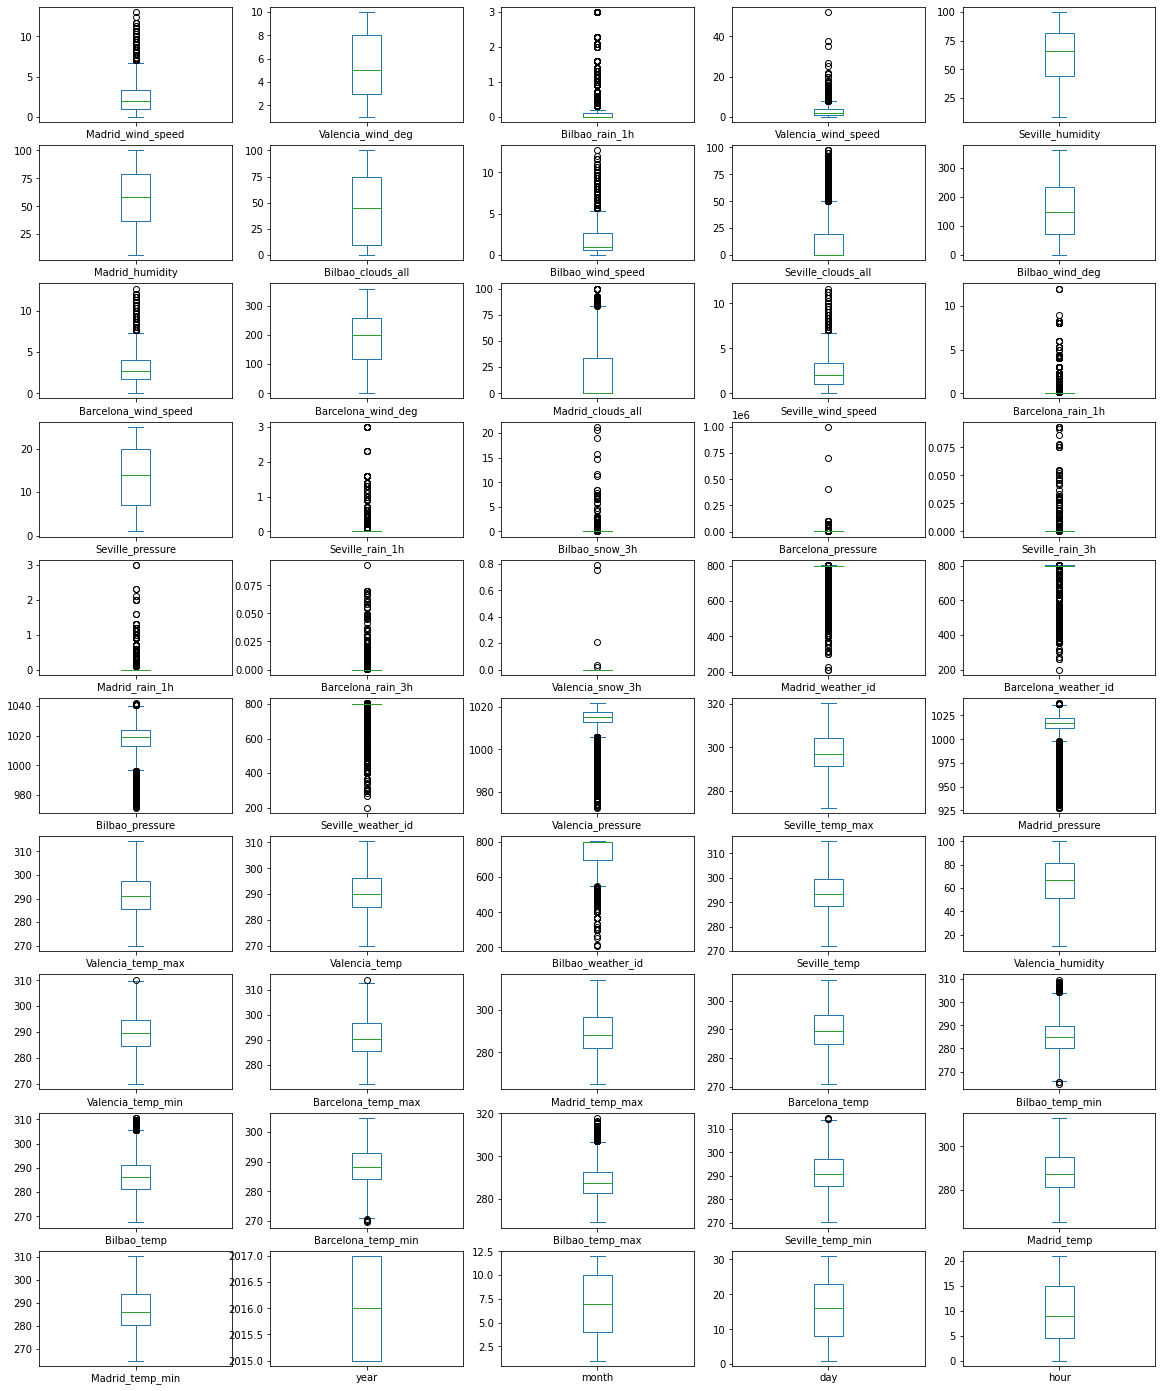

In [37]:
X[df_numerical_features].plot(
    kind='box', subplots=True, 
    layout=(10, 5), sharex=False, 
    figsize=(20, 25)
);

The boxplots also indicates the presence of outliers in several features. As deduced from the distribution plots, 
- most temperature and humidity related features are free of ouliers, except temperatures associated with bilbao.
- Pressure, rain, wind speed and cloud related feature are most affected by outliers

#### 3.4.2.2 Kurtosis of Numerical Dataset

To measure the extent of outliers statistically, kurtosis was employed. features with kurtosis > 3 are flagged as containing outliers.

In [38]:
# Calculate the kurtosis of the numerical dataset
kurt = X[df_numerical_features].kurtosis()
kurt = zip(kurt.index, kurt.values)
features_with_outliers = [(x,y) for (x,y) in kurt if y > 3]
features_with_outliers

[('Bilbao_rain_1h', 32.90465647123472),
 ('Valencia_wind_speed', 35.645426386267474),
 ('Bilbao_wind_speed', 3.6315653270441643),
 ('Barcelona_rain_1h', 101.5789308218838),
 ('Seville_rain_1h', 93.84074607373714),
 ('Bilbao_snow_3h', 806.1284706376119),
 ('Barcelona_pressure', 3687.5642300069417),
 ('Seville_rain_3h', 413.1365923500452),
 ('Madrid_rain_1h', 76.5844913665545),
 ('Barcelona_rain_3h', 187.8004595033525),
 ('Valencia_snow_3h', 4089.323165482344),
 ('Madrid_weather_id', 9.25904651532839),
 ('Barcelona_weather_id', 5.701881572742422),
 ('Seville_weather_id', 10.710308129580135),
 ('Valencia_pressure', 4.188187015429808)]

The box plots of the numeric data and the extraction of columns with outliers using kurtosis confirms the presence of outliers in those previously marked features.

#### 3.4.2.3 Skewness of Numerical Features

In [39]:
# Check the skewness of each feature
columns_with_outlier = [x[0] for x in features_with_outliers]
skewness = X[columns_with_outlier].skew()
skewness

Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Bilbao_wind_speed        1.716914
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Seville_weather_id      -3.275574
Valencia_pressure       -2.124964
dtype: float64

The skewness of the features with outliers are either less than -1 or are greater than 1. It indicates that all those features are either higly negatively skewed or highly positively skewed. Hence, it safe to conclude that the above displayed features requires handling of the outliers before they can be usefull. <br /><br />

In [22]:
# Calculating the 90th percentile for each field and comparing to the maximum value

quantile = X[columns_with_outlier].quantile(0.90) # compute the 90th percentile for each feature
outliers = []

for column in columns_with_outlier:
    focus_df = X[X[column] > quantile[column]]
    dict = {
        'column': column,
        'no_of_ouliers': focus_df.shape[0],  # no of entries above the 90th percentile
        'min': X[column].min(),
        'max': X[column].max(),
        '90th_percentile': quantile[column]
    }
    outliers.append(dict)

outliers

[{'column': 'Bilbao_rain_1h',
  'no_of_ouliers': 790,
  'min': 0.0,
  'max': 3.0,
  '90th_percentile': 0.3},
 {'column': 'Valencia_wind_speed',
  'no_of_ouliers': 846,
  'min': 0.0,
  'max': 52.0,
  '90th_percentile': 5.3333333333},
 {'column': 'Bilbao_wind_speed',
  'no_of_ouliers': 866,
  'min': 0.0,
  'max': 12.6666666667,
  '90th_percentile': 4.0},
 {'column': 'Barcelona_rain_1h',
  'no_of_ouliers': 786,
  'min': 0.0,
  'max': 12.0,
  '90th_percentile': 0.2},
 {'column': 'Seville_rain_1h',
  'no_of_ouliers': 854,
  'min': 0.0,
  'max': 3.0,
  '90th_percentile': 0.0},
 {'column': 'Bilbao_snow_3h',
  'no_of_ouliers': 97,
  'min': 0.0,
  'max': 21.3,
  '90th_percentile': 0.0},
 {'column': 'Barcelona_pressure',
  'no_of_ouliers': 866,
  'min': 670.6666666667,
  'max': 1001411.0,
  '90th_percentile': 1027.3333333333},
 {'column': 'Seville_rain_3h',
  'no_of_ouliers': 90,
  'min': 0.0,
  'max': 0.0933333333,
  '90th_percentile': 0.0},
 {'column': 'Madrid_rain_1h',
  'no_of_ouliers': 684,

Many of the features have very large descripancies between the 90th percentile and the maximum values. Hence, we can inpute representative values for entries in such features above the 90th percentile. For features such as Bilbao_snow_3h, Seville_rain_1h, Seville_rain_3h, Barcelona_rain_3h, Valencia_snow_3h because the 90th percentile are 0. indicating lack of variability in the feature entries.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| It entails the engineering of some features and the dropping of some - as identified in the EDA phase. |

---

#### Variable selection/ Removed through Correlation and Significance

In [40]:
# Correlation with the target variable
X_y_train = pd.concat([X, y], axis=1)


To check for the correlation of the predictors with the target variables, the training and the target variable were merged <br><br>

In [41]:
# Calculate correlations between predictor variables and the response variable
corrs = X_y_train.corr()['load_shortfall_3h'].sort_values(ascending=False)
corrs


load_shortfall_3h     1.000000
Valencia_temp_min     0.201863
month                 0.199048
Barcelona_temp_min    0.195984
Madrid_temp           0.186036
                        ...   
Madrid_humidity      -0.150536
Madrid_wind_speed    -0.150981
Bilbao_rain_1h       -0.152510
Seville_humidity     -0.167290
Valencia_wind_deg    -0.188674
Name: load_shortfall_3h, Length: 51, dtype: float64

### It appears all our variable are statistically significant:
- If we were to use a logic test with a significance value of 5% (p-value < 0.05)
- However, we also need to remove the effect of Multicollinearity in the predictors (i.e. those parameter mentioned above) with high correlation with each other.
- We will use the correlation with the target variable to pick the best variable to represent the others, while the others are removed
- This have better correlation with our target and will be used to represent other autocolerated variables in the dataset
    - Temperature minimum: Valencia_temp_min with correlation of 0.201863
    - Temperature: Madrid_temp correlation of 0.186036
    - Temperature Maximum: Madrid_temp_max correlation of 0.182548
    - Humidity: Seville_humidity correlation of -0.167290
    - Pressure: Madrid_pressure correlation of 0.092638

- The others columns will be droped i.e.:
    - All other temperature variables apart from the ones mention above
    - Madrid_humidity       -0.150536
    - Valencia_pressure       0.084220

### Create new features and drop less useful features

In [42]:
#getting the weather parameters dictionary
weath_param = classify_parameters(X)
weath_param


{'wind_speed': 'Madrid_wind_speed,Valencia_wind_speed,Bilbao_wind_speed,Barcelona_wind_speed,Seville_wind_speed',
 'wind_deg': 'Valencia_wind_deg,Bilbao_wind_deg,Barcelona_wind_deg',
 'rain_1h': 'Bilbao_rain_1h,Barcelona_rain_1h,Seville_rain_1h,Madrid_rain_1h',
 'humidity': 'Seville_humidity,Madrid_humidity,Valencia_humidity',
 'clouds_all': 'Bilbao_clouds_all,Seville_clouds_all,Madrid_clouds_all',
 'pressure': 'Seville_pressure,Barcelona_pressure,Bilbao_pressure,Valencia_pressure,Madrid_pressure',
 'snow_3h': 'Bilbao_snow_3h,Valencia_snow_3h',
 'rain_3h': 'Seville_rain_3h,Barcelona_rain_3h',
 'weather_id': 'Madrid_weather_id,Barcelona_weather_id,Seville_weather_id,Bilbao_weather_id',
 'temp_max': 'Seville_temp_max,Valencia_temp_max,Barcelona_temp_max,Madrid_temp_max,Bilbao_temp_max',
 'temp': 'Valencia_temp,Seville_temp,Barcelona_temp,Bilbao_temp,Madrid_temp',
 'temp_min': 'Valencia_temp_min,Bilbao_temp_min,Barcelona_temp_min,Seville_temp_min,Madrid_temp_min',
 'year': 'year',
 'month

This shows the dictionary of the weather parameters, where the keys is the specific weather parameters and the values are the sub-groups associated with them <br><br>

In [43]:
# getting name of all temperature variables alike
temp_max, temp, temp_min  = weath_param['temp_max'].split(','), weath_param['temp'].split(','),\
                            weath_param['temp_min'].split(',')

# Merging are temperature features
temp_list = temp_max + temp + temp_min
temp_list

['Seville_temp_max',
 'Valencia_temp_max',
 'Barcelona_temp_max',
 'Madrid_temp_max',
 'Bilbao_temp_max',
 'Valencia_temp',
 'Seville_temp',
 'Barcelona_temp',
 'Bilbao_temp',
 'Madrid_temp',
 'Valencia_temp_min',
 'Bilbao_temp_min',
 'Barcelona_temp_min',
 'Seville_temp_min',
 'Madrid_temp_min']

The list shows all the temperature varaiant in our dataset <br><br>

In [44]:
# Indentifying column to drop from our dataset
usable_high_corr = ['Valencia_temp_min', 'Madrid_temp', 'Madrid_temp_max']
drop_coln_list = [x for x in temp_list if x not in usable_high_corr]
# Adding humidity and pressure columns to be dropped
final_drop_list = drop_coln_list + ['Madrid_humidity', 'Valencia_pressure']
final_drop_list

['Seville_temp_max',
 'Valencia_temp_max',
 'Barcelona_temp_max',
 'Bilbao_temp_max',
 'Valencia_temp',
 'Seville_temp',
 'Barcelona_temp',
 'Bilbao_temp',
 'Bilbao_temp_min',
 'Barcelona_temp_min',
 'Seville_temp_min',
 'Madrid_temp_min',
 'Madrid_humidity',
 'Valencia_pressure']

The list shows all the features that are autocorelated and need to be drop from the dataset <br><br>

In [45]:
# we will be dropping for both the train and the test dataset
X_mod = X.drop(final_drop_list, axis=1)
X_test_mod = df_test.drop(final_drop_list, axis=1)

### Engineering new features
- Since all weather parameters (alike) exhibit the same characteristic, espicially looking at there distribution as seen in the histogram above
    - Weather parameters in the dataset: 'wind_speed', 'wind_deg', 'rain_1h', 'humidity', 'clouds_all', 'pressure', 'snow_3h', 'rain_3h', 'weather_id'
- We propose grouping the data together in other to have a leaner dataset & easy to understand there relationship with the target

In [46]:
# Creating a function that classify weather parameters
def feature_classify(input_df):
    input_df = input_df.copy()
    weather_dict = classify_parameters(input_df)
    dicting = {}
    for x, y in weather_dict.items():
        coln = y.split(',')
        temp_list = []
        if len(coln) < 2:
            continue
        else:
            input_df[x] = input_df[coln].mean(axis=1)
    return input_df


The function above combines the various location by the classifed weather parameters using the mean value to combine across all locations <br><br>

In [47]:
# variable engineering by grouping various weather parameters
X_mod1 = feature_classify(X_mod)
X_test_mod1 = feature_classify(X_test_mod)


Calling the function to classify the weather parameters to add them as features to the dataset <br><br>

In [48]:
# renaming the temperature(s) columns
X_mod1.rename(columns = {'Valencia_temp_min':'temp_min', 'Madrid_temp_max':'temp_max'
                         ,'Madrid_temp':'temp'}, inplace = True)
X_test_mod1.rename(columns = {'Valencia_temp_min':'temp_min', 'Madrid_temp_max':'temp_max',
                         'Madrid_temp':'temp'}, inplace = True)


Renaming the representative features with a general name for the different variant of the weather features <br><br>

In [49]:
# Creating new features Temperature range
X_mod1['temp_range'] = X_mod1['temp_min'] - X_mod1['temp_max']
X_test_mod1['temp_range'] = X_test_mod1['temp_max'] - X_test_mod1['temp_min']

# Creating new features wind_force
X_mod1['wind_force'] = X_mod1['wind_speed'] * X_mod1['wind_deg']
X_test_mod1['wind_force'] = X_test_mod1['wind_speed'] * X_test_mod1['wind_deg']


Creating new features temperature range from the minimum and maximum temperature and wind force from the product of wind speed and wind degree <br><br>

##### Variable selection using Permutation Importance

In [51]:
X_train_df = X_mod1.copy()

Duplicating the training dataset to allow flexible modification <br><br>

In [52]:
# Spliting the dataset to feed our model
X_train, X_valid, y_train, y_valid = train_test_split(X_train_df, y, train_size=0.8, test_size=0.2,
                                                      shuffle=False)

# We run the model in order to further guage importance of each predictors
my_model = RandomForestRegressor(n_estimators=100, min_samples_split=100,
                                  random_state=0).fit(X_train, y_train.values.ravel())

#checking the metrics to see how we perform
pred_train = my_model.predict(X_train)
pred_valid = my_model.predict(X_valid)
print("MAE: ", metrics.mean_absolute_error(y_train, pred_train))
print("MAE: ", metrics.mean_absolute_error(y_valid, pred_valid))

MAE:  2517.52431989564
MAE:  3493.216044978414


The dataset was fitted using randomForest to use the feature importance to check the weight of each features <br><br>

In [53]:
# permutation importance of our features
perm = PermutationImportance(my_model, random_state=1).fit(X_valid, y_valid)
perm_html = eli5.show_weights(perm, feature_names = X_valid.columns.tolist(), top=50)
perm_html

Weight,Feature
0.3729 ± 0.0367,hour
0.2477 ± 0.0576,day
0.0522 ± 0.0054,wind_force
0.0463 ± 0.0030,wind_speed
0.0215 ± 0.0012,temp_max
0.0206 ± 0.0028,temp_min
0.0182 ± 0.0028,temp
0.0145 ± 0.0023,Bilbao_pressure
0.0111 ± 0.0065,Madrid_wind_speed
0.0108 ± 0.0077,month


- Temperature range shoud be dropped, since it not contributing to our model positively
- We also going to drop all features with less than 0.5 weight. <br><br>

In [55]:
# Converting perm_html to DataFrame
perm_df = pd.read_html(perm_html.data)[0]

# Extracting list of varaibles with weight of less than 0.5
unuseful = list(perm_df[-36:]['Feature'])
unuseful

['Bilbao_wind_speed',
 'Bilbao_wind_deg',
 'Valencia_wind_speed',
 'Barcelona_pressure',
 'Valencia_wind_deg',
 'Madrid_pressure',
 'pressure',
 'Bilbao_weather_id',
 'Barcelona_weather_id',
 'Bilbao_rain_1h',
 'Seville_clouds_all',
 'Barcelona_wind_speed',
 'Barcelona_rain_1h',
 'Barcelona_rain_3h',
 'Bilbao_snow_3h',
 'Seville_rain_3h',
 'rain_3h',
 'Valencia_snow_3h',
 'year',
 'snow_3h',
 'Seville_rain_1h',
 'Barcelona_wind_deg',
 'rain_1h',
 'Madrid_rain_1h',
 'clouds_all',
 'Bilbao_clouds_all',
 'Madrid_weather_id',
 'wind_deg',
 'Seville_weather_id',
 'Seville_wind_speed',
 'weather_id',
 'Madrid_clouds_all',
 'Seville_pressure',
 'temp_range',
 'humidity',
 'Seville_humidity']

The list above represent the features that will be dropped <br><br>

In [56]:
# Dropping the unuseful varaibles
X_train_df = X_train_df.drop(unuseful, axis=1)
X_test_mod2 = X_test_mod1.drop(unuseful, axis=1)


In [57]:
# Spliting the new modifed dataset again to feed our model
X_train, X_valid, y_train, y_valid = train_test_split(X_train_df, y, train_size=0.8, test_size=0.2,
                                                      shuffle=False)

# We run the model again to see if there is improvement and to further adjust our predictors
my_model = RandomForestRegressor(n_estimators=100, min_samples_split=100,
                                  random_state=0).fit(X_train, y_train.values.ravel())

#checking the metrics to see how we perform
pred_train = my_model.predict(X_train)
pred_valid = my_model.predict(X_valid)
print("MAE: ", metrics.mean_absolute_error(y_train, pred_train))
print("MAE: ", metrics.mean_absolute_error(y_valid, pred_valid))

MAE:  2629.865958238791
MAE:  3469.781358231115


There was an improvement, so we can justify removing the variables above

In [ ]:
X_train_df.shape

This shows the final shape of our dataset, which contain 7010 rows and 11 features <br><br>

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, several models were created and evaluated using the engineered dataset. The models created includes Linear Regression model, Random Forest Regressor, KNN Regressor, Lasso Regressor, Decision Tree regressor, XGBoost model and Bagging model|

---

In [60]:
# Creating a function that check metrics
def metrics_fn(y, predict):
    mae = round(metrics.mean_absolute_error(y, predict), 2)
    mse = round(metrics.mean_squared_error(y, predict), 2)
    r2 = round(metrics.r2_score(y, predict), 4)
    return mae, mse, r2

## Creating different regression models

#### 1. Linear Regression Model

In [61]:
# Function for creating Linear Regression
def score_dataset_lr(X_train, X_valid, y_train, y_valid):
    model = LinearRegression()
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_valid = model.predict(X_valid)
    train_met = metrics_fn(y_train, pred_train)
    valid_met = metrics_fn(y_valid, pred_valid)
    return train_met, valid_met, pred_train, pred_valid

The function above takes in actual target value and the predicted value and computes the MAE, the MSE and the r2 metric. <br ><br>

In [62]:
print("METRICS for Linear Regression")
linear_model = score_dataset_lr(X_train, X_valid, y_train, y_valid)
linear_result = pd.DataFrame(linear_model[:-2], index=['Training', 'Validation'], columns=['MAE', 'MSE', 'R2'])
linear_result

METRICS for Linear Regression


,MAE,MSE,R2
Training,3911.48,23883227.31,0.1015
Validation,3933.00,24366003.07,-0.0246


The Linear Regression model has a close performance on both the train and validation set indicating that it can generalize. Although from the EDA phase where it was observed that most of the predictors did not share linear relationship with the target variable. Hence, it is not in the expectation that the linear regression model with perform well. <br />

#### 2. DecisionTreeRegressor Model

In [63]:
# Function for creating XGBRegressor
def score_dataset_dtr(X_train, X_valid, y_train, y_valid):
    model = DecisionTreeRegressor(max_depth=9, random_state=0, max_leaf_nodes=500)
    model.fit(X_train, y_train.values.ravel())
    pred_train = model.predict(X_train)
    pred_valid = model.predict(X_valid)
    train_met = metrics_fn(y_train, pred_train)
    valid_met = metrics_fn(y_valid, pred_valid)
    return train_met, valid_met, pred_train, pred_valid

The function above takes in actual target value and the predicted value and computes the MAE, the MSE and the r2 metric. <br ><br>

In [64]:
print("METRICS for Decision Tree Regressor")
dtr_model = score_dataset_dtr(X_train, X_valid, y_train, y_valid)
dtr_result = pd.DataFrame(dtr_model[:-2], index=['Training', 'Validation'], columns=['MAE', 'MSE', 'R2'])
dtr_result

METRICS for Decision Tree Regressor


,MAE,MSE,R2
Training,2397.06,9808500.20,0.6310
Validation,3882.84,23402833.57,0.0159


The Decision tree model has a wide variant in performance on the training dataset and validation set indicating that it generalize poorly. An evidence or indication of overfitting of the model. Although, its still manages to perform better than the Linear regressor even at such state. <br><br>

#### 3. XGBoost Regressor Model

In [65]:
# Function for creating XGBRegressor
def score_dataset_xgb(X_train, X_valid, y_train, y_valid):
    model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate = 0.06)
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_valid = model.predict(X_valid)
    train_met = metrics_fn(y_train, pred_train)
    valid_met = metrics_fn(y_valid, pred_valid)
    return train_met, valid_met, pred_train, pred_valid

The function above takes in actual target value and the predicted value and computes the MAE, the MSE and the r2 metric. <br ><br>

In [66]:
print("METRICS for XGB Regressor")
xgb_model = score_dataset_xgb(X_train, X_valid, y_train, y_valid)
xgb_result = pd.DataFrame(xgb_model[:-2], index=['Training', 'Validation'], columns=['MAE', 'MSE', 'R2'])
xgb_result

METRICS for XGB Regressor


,MAE,MSE,R2
Training,2380.05,8981454.46,0.6621
Validation,3405.50,17360891.93,0.2700


The XGboost model has a wide variant in performance on the training dataset and validation set indicating that it generalize poorly, though it was better than the decision tree model. An evidence or indication of overfitting of the model persists. Although, its still manages to perform better than the Decision tree regressor even at such state. <br><br>

##### 4. Bagging Regressor

In [67]:
# Instantiate XGBRegressor model to use as the base model
d_tree = XGBRegressor(n_estimators=100, max_depth=5, learning_rate = 0.06)
# Instantiate BaggingRegressor model with a decision tree as the base model
bag_reg = BaggingRegressor(base_estimator = d_tree, random_state=0, n_estimators=100)

In [68]:
bag_reg.fit(X_train, y_train.values.ravel())

pred_bgr_train = bag_reg.predict(X_train)
pred_bgr_valid = bag_reg.predict(X_valid)
print("MAE: ", metrics.mean_absolute_error(y_train, pred_bgr_train))
print("MAE: ", metrics.mean_absolute_error(y_valid, pred_bgr_valid))

KeyboardInterrupt: 

The Bagging model has a better prediction and it was an improvement over the other model as it MAE scores difference were smaller. <br><br>

#### Saving Predictions

In [ ]:
# predicting for our test dataset
preds_test = bag_reg.predict(X_test_mod2)

In [ ]:
# load the test data again to extract time
test_df = pd.read_csv('df_test.csv')

# Saving test predictions to file
output = pd.DataFrame({'time': test_df.time,
                       'load_shortfall_3h': preds_test})
output.to_csv('submission.csv', index=False)

#### Saving Best Model

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section we compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

#### Compare model performance

In [ ]:
# Create figure and axes
f, ax = plt.subplots(figsize=(20,15), nrows=2, ncols=2, sharey=True)
ax = ax.ravel()
# Create list of titles and predictions to use in for loop
pred_train = [linear_model[-2], dtr_model[-2], xgb_model[-2], pred_bgr_train]
pred_valid = [linear_model[-1], dtr_model[-1], xgb_model[-1], pred_bgr_valid]
title = ['Linear Regression','Decision tree', 'XGboost', 'Bagging Regressor']
y_valids = y_valid.values.ravel()
# Loop through all axes to plot each model's results 
for i in range(4):
    mae_train = round(metrics.mean_absolute_error(pred_train[i], y_train))
    mae_valid = round(metrics.mean_absolute_error(pred_valid[i], y_valid))
    ax[i].set_title(title[i]+"  (MAE Train: "+str(mae_train)+ ")\n(MAE Valid: "+str(mae_valid)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    sns.lineplot(x=y_valids, y=y_valids, ax=ax[i])
    sns.scatterplot(x=y_valids, y=pred_valid[i].ravel(), ax=ax[i], label='Validation')
    sns.scatterplot(x=y_train.values.ravel(), y=pred_train[i].ravel(), ax=ax[i], alpha=0.2, label='Training') 
plt.savefig('test.png', bbox_inches='tight')
plt.show();

# Choosing the best model and what motivate our choice
- Looking at the Linear model it was underfitting and this affected its predictive power.
- Descision Tree was overfitting and with even poor predictive power
- XGboost regressor was more balance but with little overfitting in the train set which latter affect it predictive power while been tested on unseen data
- Bagging regressor using XGboost as it primary model was able to correct the overfit alittle bit which makes it perform better while predicting unseen data
    - Bagging regressor (Ensemble method) was our best choice, which was informed by the Less overfitting compared to other model (i.e. generalizes much better);

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, we discuss how the best performing model works in a simple way so that technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

# Chosen methods logic

* XGBoost: Stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.
<img src="img-3.png" width=300 height=300 />
- If we break down the model we have the following part or concepts that makes up XGBoost
    * Supervised machine learning uses algorithms to train a model to find patterns in a dataset with target and predictors and then uses the trained model to predict the target on a new dataset’s predictors.
    * Decision trees create a model that predicts the label by evaluating a tree of if-then-else true/false feature questions, and estimating the minimum number of questions needed to assess the probability of making a correct decision.
    * A Gradient Boosting Decision Trees (GBDT) is a decision tree `ENSEMBLE` learning algorithm similar to random forest, for classification and regression. Ensemble learning algorithms combine multiple machine learning algorithms to obtain a better model.
    
* Bagging is a similar ensemble method like XGBoost, training the models of the ensemble on different subsets of the training data. As such, the resulting 'bag' of models are together more stable due to decreased variance error.
    - We choose to use another ensembling model on XGBoost because it was overfitting and we discovered that Bagging (Bootstrap Aggregating) was able to reduce overfitting and have better prediction on unseen data.